In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("/kaggle/input/titanic/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.drop(columns = ['PassengerId','Name', 'SibSp','Parch','Ticket','Cabin','Embarked'], inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [31]:
df.dtypes

# Sex column is categorical

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [34]:
sex = {'female':0, 'male':1}

df['Sex_Encoded'] = df['Sex'].map(sex)
df.drop(columns = ['Sex'], inplace = True)
df.sample(10)

,Survived,Pclass,Age,Fare,Sex_Encoded
438,0,1,64.0,263.0000,1
288,1,2,42.0,13.0000,1
336,0,1,29.0,66.6000,1
242,0,2,29.0,10.5000,1
394,1,3,24.0,16.7000,0
884,0,3,25.0,7.0500,1
744,1,3,31.0,7.9250,1
226,1,2,19.0,10.5000,1
34,0,1,28.0,82.1708,1
329,1,1,16.0,57.9792,0


In [37]:
df.dtypes

# Now all the columns are in correct type

Survived         int64
Pclass           int64
Age            float64
Fare           float64
Sex_Encoded      int64
dtype: object

In [45]:
df.isnull().sum()

Survived         0
Pclass           0
Age            177
Fare             0
Sex_Encoded      0
dtype: int64

In [54]:
import math

mean = math.floor(df.Age.mean())
df.Age.fillna(mean, inplace = True)

In [55]:
df.isnull().sum()

Survived       0
Pclass         0
Age            0
Fare           0
Sex_Encoded    0
dtype: int64

In [56]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

X.shape, y.shape

((891, 4), (891,))

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred = model.predict(X_test)

In [60]:
model.score(X_test, y_test)

0.776536312849162

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



<Axes: >

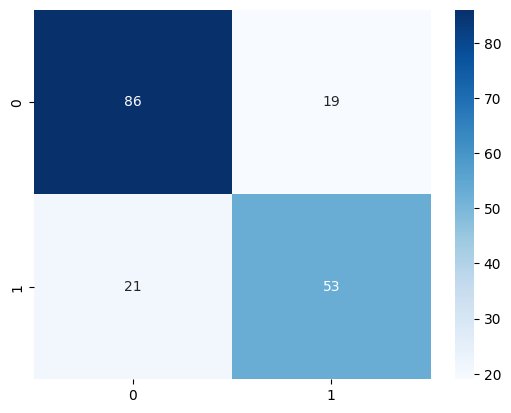

In [63]:
import seaborn as sns
sns.heatmap(cm, cmap='Blues', annot=True)